<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# EU government bond yields - data visualisation exercise

In this exercise we'll use the dataset of long term government bond yields from [data.europa.eu](https://data.europa.eu/euodp/en/data/dataset/JmCLAeHrvXI80AhjeV3zYQ) that we saw in a previous `pandas` practice.

### 1. Load the data

Use the version of the dataset you exported from the `pandas` exercise. Otherwise you can use a cleaned version provided in the `datasets` folder.

In [1]:
import pandas as pd

df = pd.read_csv("../datasets/eu-govt-bonds-cleaned.csv")
df.head()

,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01,country_code,Country
0,0.45,0.38,0.31,0.24,0.03,-0.10,-0.37,-0.30,-0.20,-0.09,-0.04,-0.09,AT,Austria
1,0.69,0.54,0.47,0.41,0.15,0.00,-0.28,-0.24,-0.16,-0.04,0.01,-0.03,BE,Belgium
2,0.68,0.67,0.50,0.48,0.32,0.43,0.35,0.35,0.25,0.22,0.18,0.15,BG,Bulgaria
3,2.00,1.74,1.49,1.34,0.82,0.66,0.44,0.48,0.51,0.58,0.57,0.61,CY,Cyprus
4,1.76,1.82,1.82,1.86,1.58,1.36,0.99,1.24,1.32,1.47,1.51,1.62,CZ,Czechia


### 2. Plot the average rate per country using a *horizontal bar chart*

Remember to get into the habit of labelling your axes, adding a title etc.

*Bonus: sort the data so that bars are in descending order in size (from top to bottom)*

In [2]:
# as we saw in the pandas exercise, this "wide format" data means calculating average rate
# is not the usual group by country then aggregate, but instead we "squash" all the numeric values
# along the column axis
avg_by_country = (
    df
      .drop("country_code", axis=1) # no need for the code
      .dropna(subset=["Country"]) # drop missing countries (i.e. with non-country codes)
      .set_index("Country").mean(axis=1) # calculate mean along columns
)
avg_by_country.head()

Country
Austria     0.018333
Belgium     0.126667
Bulgaria    0.381667
Cyprus      0.936667
Czechia     1.529167
dtype: float64

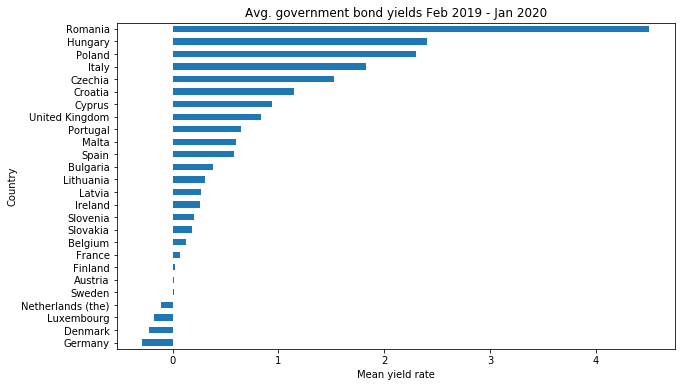

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 6))

avg_by_country.sort_values().plot.barh(ax=ax)

ax.set(title="Avg. government bond yields Feb 2019 - Jan 2020",
       xlabel="Mean yield rate",
       ylabel="Country")

plt.show()

### 3. Plot each country's rates over time on a line chart

### 3. a) Get the data in the right format

To make this easier using `matplotlib`, getting the data in the right format is key, so this answer will take a few parts to get right.

The format we're aiming for is each column being a country and each row a month:

| Month | Austria   | ... |
|---------|---------|------|
| 2019M02 | 0.45 | ... |
| 2019M03 | 0.38 | ... |

The [relevant `pandas` documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html) should help you get the data into the desired format.

In [4]:
# One approach is to simply transpose the table
# (making the country the index first so it becomes the column names)
df_for_time_series = (
    df
      .drop("country_code", axis=1) # redundant column
      .dropna(subset=["Country"]) # choosing to remove NULL countries
      .set_index("Country") # preserve country as column name when transposing
      .T # and transpose!
)
df_for_time_series.head()

Country,Austria,Belgium,Bulgaria,Cyprus,Czechia,Germany,Denmark,Spain,Finland,France,...,Latvia,Malta,Netherlands (the),Poland,Portugal,Romania,Sweden,Slovenia,Slovakia,United Kingdom
2019M02,0.45,0.69,0.68,2.00,1.76,0.06,0.05,1.31,0.38,0.55,...,0.81,1.17,0.24,2.69,1.55,4.79,0.36,0.87,0.78,1.20
2019M03,0.38,0.54,0.67,1.74,1.82,0.01,0.16,1.13,0.35,0.44,...,0.70,1.03,0.15,2.75,1.32,4.80,0.29,0.67,0.68,1.14
2019M04,0.31,0.47,0.50,1.49,1.82,-0.04,0.08,1.05,0.34,0.37,...,0.58,1.00,0.20,2.76,1.18,4.91,0.23,0.52,0.57,1.15
2019M05,0.24,0.41,0.48,1.34,1.86,-0.13,0.04,0.87,0.25,0.30,...,0.51,0.95,0.11,2.72,1.02,4.93,0.07,0.38,0.45,1.06
2019M06,0.03,0.15,0.32,0.82,1.58,-0.31,-0.22,0.50,0.05,0.08,...,0.33,0.73,-0.09,2.35,0.59,4.59,-0.09,0.19,0.25,0.84


In [5]:
# The other option is a two-step stack and unstack
# first stack to make each row a country-date combination,
# then unstack to leave dates as rows, countries as columns
(
    df
      .drop("country_code", axis=1)
      .dropna(subset=["Country"])
      .set_index("Country") # again, preserve country names as future column names
      .stack() # data is now one row per country + month
      .unstack(0) # unstack the first column (country) to make it the new set of columns
)

Country,Austria,Belgium,Bulgaria,Cyprus,Czechia,Germany,Denmark,Spain,Finland,France,...,Latvia,Malta,Netherlands (the),Poland,Portugal,Romania,Sweden,Slovenia,Slovakia,United Kingdom
2019M02,0.45,0.69,0.68,2.00,1.76,0.06,0.05,1.31,0.38,0.55,...,0.81,1.17,0.24,2.69,1.55,4.79,0.36,0.87,0.78,1.20
2019M03,0.38,0.54,0.67,1.74,1.82,0.01,0.16,1.13,0.35,0.44,...,0.70,1.03,0.15,2.75,1.32,4.80,0.29,0.67,0.68,1.14
2019M04,0.31,0.47,0.50,1.49,1.82,-0.04,0.08,1.05,0.34,0.37,...,0.58,1.00,0.20,2.76,1.18,4.91,0.23,0.52,0.57,1.15
2019M05,0.24,0.41,0.48,1.34,1.86,-0.13,0.04,0.87,0.25,0.30,...,0.51,0.95,0.11,2.72,1.02,4.93,0.07,0.38,0.45,1.06
2019M06,0.03,0.15,0.32,0.82,1.58,-0.31,-0.22,0.50,0.05,0.08,...,0.33,0.73,-0.09,2.35,0.59,4.59,-0.09,0.19,0.25,0.84
2019M07,-0.10,0.00,0.43,0.66,1.36,-0.39,-0.31,0.35,-0.09,-0.07,...,0.15,0.52,-0.21,2.13,0.44,4.51,-0.12,-0.01,0.02,0.73
2019M08,-0.37,-0.28,0.35,0.44,0.99,-0.65,-0.58,0.14,-0.35,-0.34,...,-0.07,0.21,-0.50,1.93,0.17,4.12,-0.36,-0.06,-0.34,0.49
2019M09,-0.30,-0.24,0.35,0.48,1.24,-0.59,-0.59,0.18,-0.30,-0.28,...,-0.11,0.19,-0.43,2.02,0.20,4.12,-0.23,-0.16,-0.34,0.58
2019M10,-0.20,-0.16,0.25,0.51,1.32,-0.47,-0.43,0.20,-0.21,-0.16,...,0.00,0.26,-0.31,1.96,0.19,4.12,-0.16,-0.09,-0.20,0.61
2019M11,-0.09,-0.04,0.22,0.58,1.47,-0.35,-0.31,0.39,-0.08,-0.02,...,0.10,0.37,-0.19,2.05,0.35,4.32,0.00,-0.01,0.09,0.73


### 3. b) Now plot the time series

Remember to include axis labels, a title, and a legend

*Bonus: replace the 2019M02-style labels with a more human-readable label for months*

In [6]:
# let's first 'fix' the label issue at source
# we'll set each row's date to be an actual datetime (usually a good idea with time series)
import datetime

# datetime.datetime(year, month, day) creates a new date object,
# which here we populate using the first 4 characters (year) of the month string
# the last two (month) and a hard-coded 1, so all months convert to a date object
# representing the first day of that month

# using a list comprehension
dates = [datetime.datetime(int(i[:4]), # first 4 characters = year
                           int(i[-2:]), # last 2 = month
                           1 # hard-coded 1
                           ) for i in df_for_time_series.index]
dates

[datetime.datetime(2019, 2, 1, 0, 0),
 datetime.datetime(2019, 3, 1, 0, 0),
 datetime.datetime(2019, 4, 1, 0, 0),
 datetime.datetime(2019, 5, 1, 0, 0),
 datetime.datetime(2019, 6, 1, 0, 0),
 datetime.datetime(2019, 7, 1, 0, 0),
 datetime.datetime(2019, 8, 1, 0, 0),
 datetime.datetime(2019, 9, 1, 0, 0),
 datetime.datetime(2019, 10, 1, 0, 0),
 datetime.datetime(2019, 11, 1, 0, 0),
 datetime.datetime(2019, 12, 1, 0, 0),
 datetime.datetime(2020, 1, 1, 0, 0)]

In [7]:
# now use this to re-index the transposed dataframe
df_for_time_series.index = dates
df_for_time_series.head()

Country,Austria,Belgium,Bulgaria,Cyprus,Czechia,Germany,Denmark,Spain,Finland,France,...,Latvia,Malta,Netherlands (the),Poland,Portugal,Romania,Sweden,Slovenia,Slovakia,United Kingdom
2019-02-01,0.45,0.69,0.68,2.00,1.76,0.06,0.05,1.31,0.38,0.55,...,0.81,1.17,0.24,2.69,1.55,4.79,0.36,0.87,0.78,1.20
2019-03-01,0.38,0.54,0.67,1.74,1.82,0.01,0.16,1.13,0.35,0.44,...,0.70,1.03,0.15,2.75,1.32,4.80,0.29,0.67,0.68,1.14
2019-04-01,0.31,0.47,0.50,1.49,1.82,-0.04,0.08,1.05,0.34,0.37,...,0.58,1.00,0.20,2.76,1.18,4.91,0.23,0.52,0.57,1.15
2019-05-01,0.24,0.41,0.48,1.34,1.86,-0.13,0.04,0.87,0.25,0.30,...,0.51,0.95,0.11,2.72,1.02,4.93,0.07,0.38,0.45,1.06
2019-06-01,0.03,0.15,0.32,0.82,1.58,-0.31,-0.22,0.50,0.05,0.08,...,0.33,0.73,-0.09,2.35,0.59,4.59,-0.09,0.19,0.25,0.84


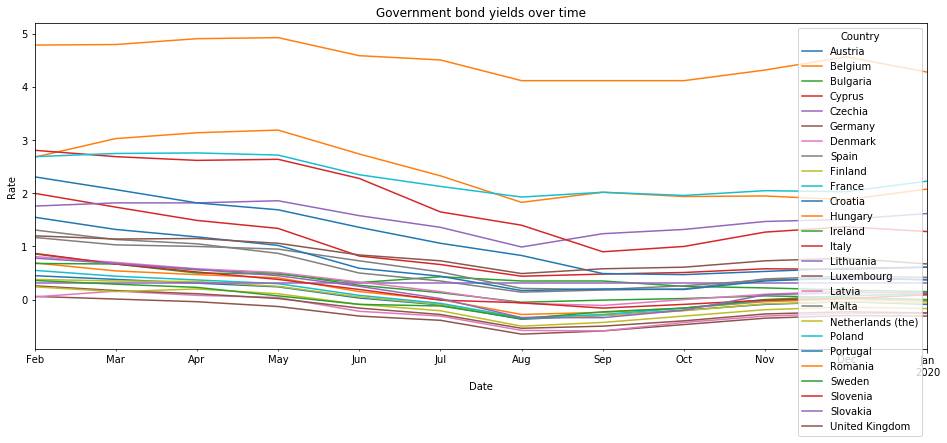

In [8]:
fig, ax = plt.subplots(figsize=(16, 6))

df_for_time_series.plot(ax=ax)

ax.set(title="Government bond yields over time",
       xlabel="Date",
       ylabel="Rate")

plt.show()

### 3. c) Create a more interpretable visual

Clearly that's too many countries to put on a static image.

Recreate the visual but only for the following countries: Belgium, Germany, Denmark, Finland, and Slovakia

Add a faint, dashed, horizontal line at y=0 so it's clear where rates go above/below 0

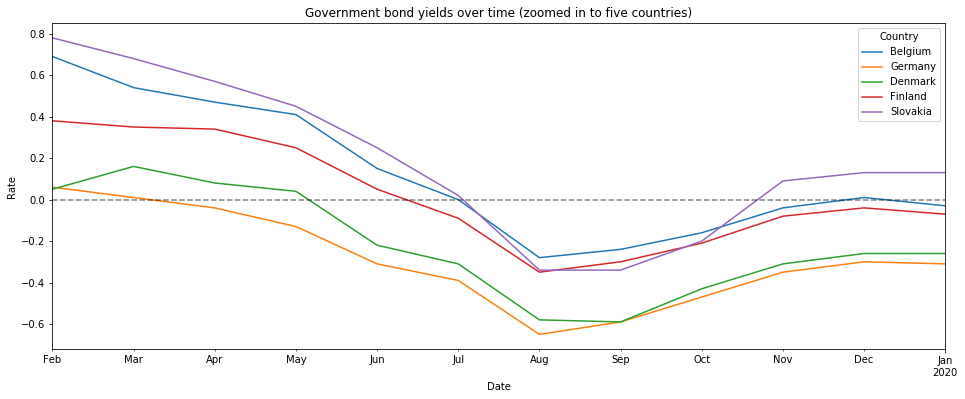

In [9]:
df_five_countries = df_for_time_series[["Belgium", "Germany", "Denmark", "Finland", "Slovakia"]]

fig, ax = plt.subplots(figsize=(16, 6))

df_five_countries.plot(ax=ax)

ax.set(title="Government bond yields over time (zoomed in to five countries)",
       xlabel="Date",
       ylabel="Rate")

ax.axhline(0, linestyle="dashed", color="black", alpha=0.5)

plt.show()

### 4. [Advanced] Use the `seaborn` library to visualise the spread of rates per country

Choose an appropriate visualisation to show not just the average, but the distribution of rate values per country. Your visualisation should show one row/column per country and the resulting spread/distribution of rate.

Seaborn has a few options for you to try, have a look at [the example gallery](https://seaborn.pydata.org/examples/index.html).

*Hint: you may find it easier to convert your data to a narrow format first*

Reminder:

The idea is rather than having a column per month, have a "month" column and have all the values stored in it. The data should therefore look like this:

| Country | Month   | Rate |
|---------|---------|------|
| Austria | 2019M02 | 0.45 |
| Austria | 2019M03 | 0.38 |

Use [this pandas article](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html) to help you find the right command.

You can read more about wide vs. narrow data here: [https://en.wikipedia.org/wiki/Wide_and_narrow_data](https://en.wikipedia.org/wiki/Wide_and_narrow_data)

In [10]:
df_stacked = (
    df
     .drop("country_code", axis=1)
     .dropna(subset=["Country"])
     .set_index("Country")
     .stack() # this puts all the month columns in one column
     .reset_index() # convert the resulting Series to a DataFrame
     .rename(columns={"level_1": "month", 0: "rate"}) # rename the resulting default column names
)

df_stacked.head()

,Country,month,rate
0,Austria,2019M02,0.45
1,Austria,2019M03,0.38
2,Austria,2019M04,0.31
3,Austria,2019M05,0.24
4,Austria,2019M06,0.03


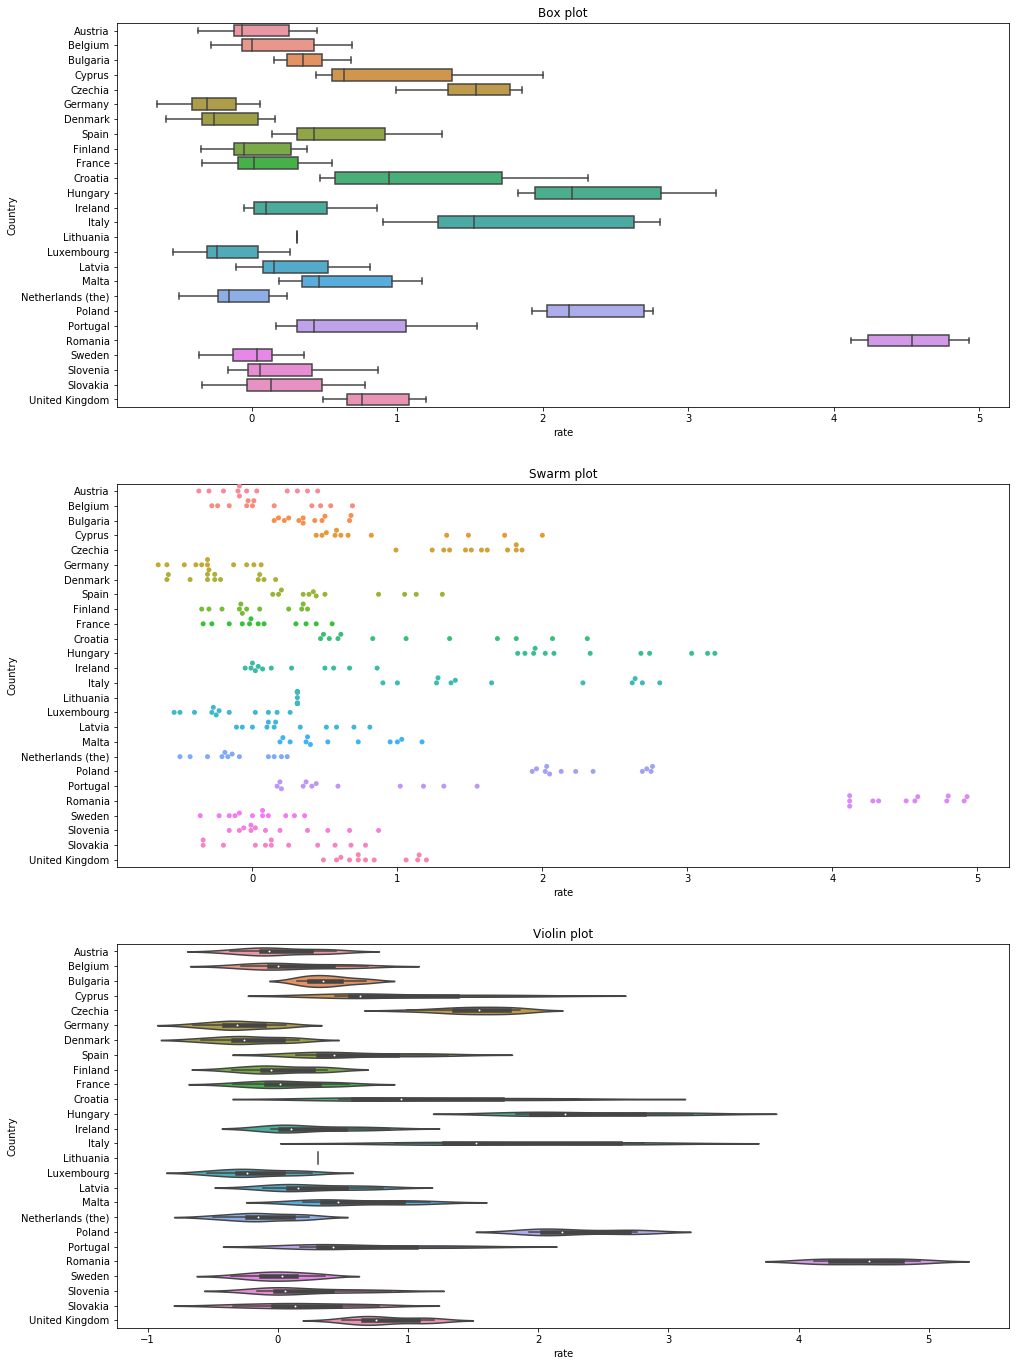

In [11]:
import seaborn as sns

fig, ax = plt.subplots(3, 1, figsize=(16, 24))

# options include boxplot, swarmplot, violinplot
# let's show all three!

sns.boxplot(data=df_stacked,
            x="rate",
            y="Country",
            ax=ax[0])

ax[0].set_title("Box plot")

sns.swarmplot(data=df_stacked,
              x="rate",
              y="Country",
              ax=ax[1])
ax[1].set_title("Swarm plot")

sns.violinplot(data=df_stacked,
               x="rate",
               y="Country",
               ax=ax[2])
ax[2].set_title("Violin plot")

plt.show()